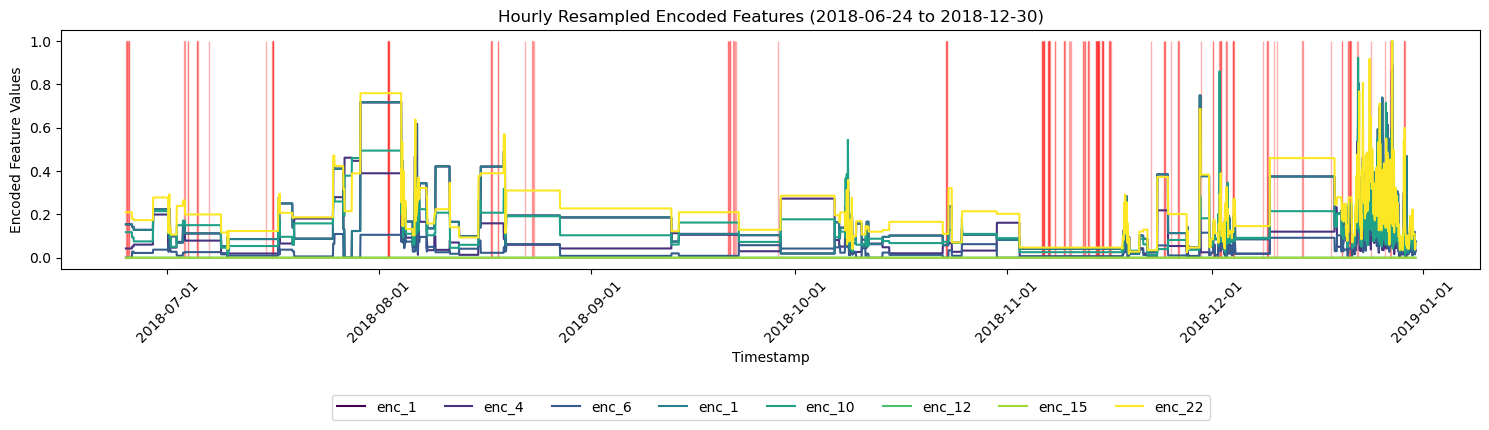

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Define the date range
start_date = '2018-06-24'
end_date = '2018-12-30'

# Load the main dataset
file_path = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWSFinal/data/DEC_Results/Encoded_Forecasting_Dataset_Normalized.csv'
data = pd.read_csv(file_path)
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Filter the main dataset based on the date range
filtered_data = data.loc[start_date:end_date]

# Resample the filtered data to an hourly frequency
filtered_data_hourly = filtered_data.resample('1H').max()

# Forward fill any missing values
filtered_data_hourly_ffill = filtered_data_hourly.ffill()

# Load and filter the cleaned hourly data
VONAMAGMA_path = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWSFinal/data/VONAMAGMA_HOURLY.csv'  # Update this path
VONAMAGMA_data = pd.read_csv(VONAMAGMA_path)
VONAMAGMA_data['DateTime'] = pd.to_datetime(VONAMAGMA_data['DateTime'])
VONAMAGMA_data = VONAMAGMA_data.set_index('DateTime').loc[start_date:end_date]

# Specify the features to plot
features_to_plot = ['enc_1','enc_4', 'enc_6', 'enc_1', 'enc_10', 'enc_12', 'enc_15', 'enc_22']

# Plotting
plt.figure(figsize=(15, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(features_to_plot)))

# Highlighting the full hour for each timestamp in the cleaned data
for cleaned_hour in VONAMAGMA_data.index:
    # Start of the hour
    hour_start = cleaned_hour.floor('H')
    # End of the hour
    hour_end = hour_start + pd.Timedelta(hours=1)
    plt.fill_betweenx([0, 1], hour_start, hour_end, color='red', alpha=0.3)

for i, column in enumerate(features_to_plot):
    plt.plot(filtered_data_hourly_ffill.index, filtered_data_hourly_ffill[column], label=column, color=colors[i])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

plt.title(f'Hourly Resampled Encoded Features ({start_date} to {end_date})')
plt.xlabel('Timestamp')
plt.ylabel('Encoded Feature Values')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
